# **Classification SVM Project**


Team Members

1. Sagar Yellaram (101167900)
2. Rinish Pannala (101168496)
3. SaiVamsi Pati (101164962)
4. Aravind Katta (101166810)
5. Harsha Vardhan Reddy Ginjala (101158932)
6. Madhava Seeta Ramaiah kosana (101145085)
7. Manohar Kakarla (101164639)
8. Akshay Kumar Reddy Thumma Joseph (101157870)
9. Priyanka Gopu (101158933)
---



In [ ]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

**Data Exploration & Preparation**

In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()

# Split the dataset into features x and target variable y
X = iris.data
y = iris.target

Data Preprocessing

Preprocessing the data by handling missing values, scaling features and encoding categorical variables.

In [ ]:
# Check for missing values
missingValues = np.sum(np.isnan(X))
print("Missing Values:\n", missingValues)

Missing Values:
 0


In [ ]:
# Finding shape of the dataset
num_of_rows = X.shape[0]
num_of_columns = X.shape[1]
print("Number of rows:", num_of_rows)
print("Number of columns:", num_of_columns)

Number of rows: 150
Number of columns: 4


In [ ]:
print("Shape of the dataset (X):", X.shape)

Shape of the dataset (X): (150, 4)


In [ ]:
# Display the first five rows of the dataset
print("First five rows of the dataset (X):\n", X[:5])  # Assuming you want to display the first 5 rows

First five rows of the dataset (X):
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
# Convert the feature matrix X to a pandas DataFrame
X_df = pd.DataFrame(data=X, columns=iris.feature_names)

# Check for duplicate rows
duplicates = X_df.duplicated()

# Find and print duplicate rows
duplicated_rows = X_df[duplicates]
print("Duplicated rows:\n", duplicated_rows)

Duplicated rows:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
142                5.8               2.7                5.1               1.9


In [ ]:
# Display the labels of the columns
print("dataset columns:")
print(iris.feature_names)

dataset columns:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**SVM Implementation**

In [ ]:
# SVM Implementation
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_scaled, y_train)

SVC()

Experimenting with different SVM kernels and parameters to find the optimal model for task.

In [ ]:
# Importing GridSearchCV from scikit-learn
from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
parameterGrid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Instantiate SVM classifier
svm = SVC()

# Grid search with cross-validation
grid_search = GridSearchCV(svm, parameterGrid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

# Best model
best_model = grid_search.best_estimator_

# Evaluation on test set
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.9666666666666667
Precision: 0.9694444444444444
Recall: 0.9666666666666667
F1 Score: 0.9664109121909632


**K-fold Cross-Validation**

In [ ]:
# K-fold Cross-Validation
k = 5
kf_cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=k)
print("Cross-Validation Scores:", kf_cv_scores)
print("Mean CV Accuracy:", np.mean(kf_cv_scores))

Cross-Validation Scores: [0.95833333 1.         0.83333333 1.         0.95833333]
Mean CV Accuracy: 0.95


In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Define the number of folds (e.g., 5 or 10)
k = 5

# Initialize KFold cross-validation
kfcv = KFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store cross-validation scores
crossvalidation_scores = []

# Perform K-fold cross-validation
for train_index, val_index in kfcv.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Train SVM model on the training fold
    svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
    svm_model.fit(X_train_fold, y_train_fold)

    # Evaluate on the validation fold
    val_score = svm_model.score(X_val_fold, y_val_fold)
    crossvalidation_scores.append(val_score)

# Calculate mean cross-validation score
mean_cross_validation_score = np.mean(crossvalidation_scores)
print("Manual Mean Cross-Validation Accuracy:", mean_cross_validation_score)

# Using cross_val_score function
cv_scores_cross_val = cross_val_score(svm_model, X_train_scaled, y_train, cv=k)
mean_crossvalidation_score_cross_val = np.mean(cv_scores_cross_val)
print("Cross_val_score of Mean Cross-Validation Accuracy:", mean_crossvalidation_score_cross_val)

Manual Mean Cross-Validation Accuracy: 0.95
Cross_val_score of Mean Cross-Validation Accuracy: 0.95


**Evaluation Metrics**

Found the accuarcy, precision, recall and F1- score

In [ ]:
# Evaluation Metrics
y_prediction = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction, average='weighted')
recall = recall_score(y_test, y_prediction, average='weighted')
f1 = f1_score(y_test, y_prediction, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


**Visualizing the results**


Confusion Matrix

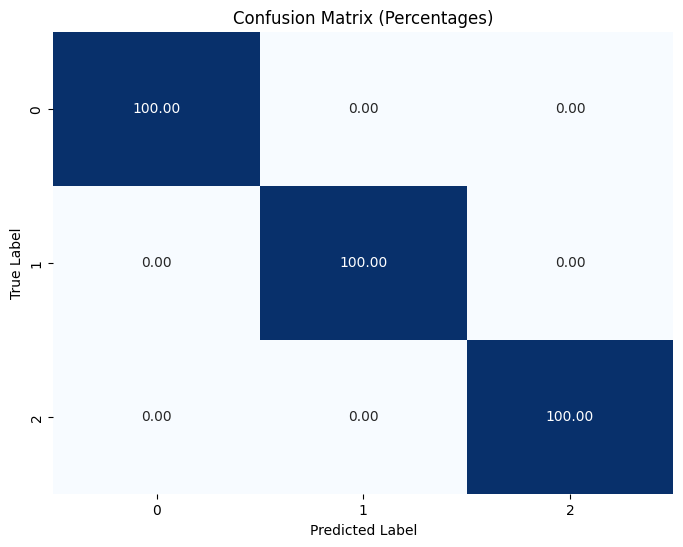

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate percentages
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot confusion matrix with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Percentages)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


ROC Curve

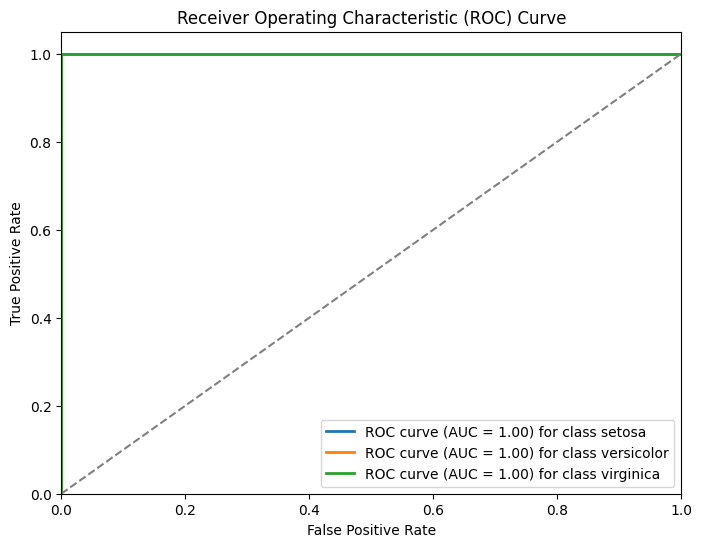

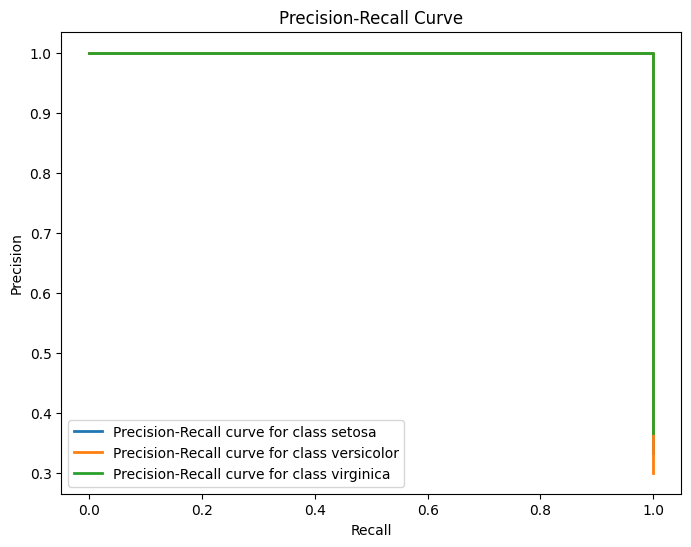

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Convert y_test and y_pred to binary format
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(iris.target_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(iris.target_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (AUC = %0.2f) for class %s' % (roc_auc[i], iris.target_names[i]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Compute precision-recall curve for each class
precision = dict()
recall = dict()
for i in range(len(iris.target_names)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_bin[:, i])

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
for i in range(len(iris.target_names)):
    plt.plot(recall[i], precision[i], lw=2, label='Precision-Recall curve for class %s' % iris.target_names[i])

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

Learning Curve

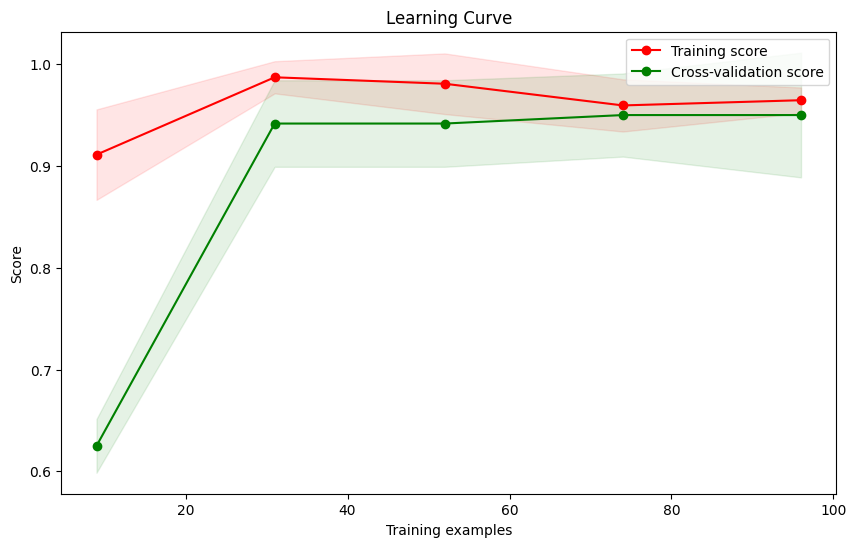

In [ ]:
# Import learning curve
from sklearn.model_selection import learning_curve

#Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    svm_model, X_train_scaled, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

# Compute mean and standard deviation of training and test scores across cross-validation folds
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

Plotting accuracy

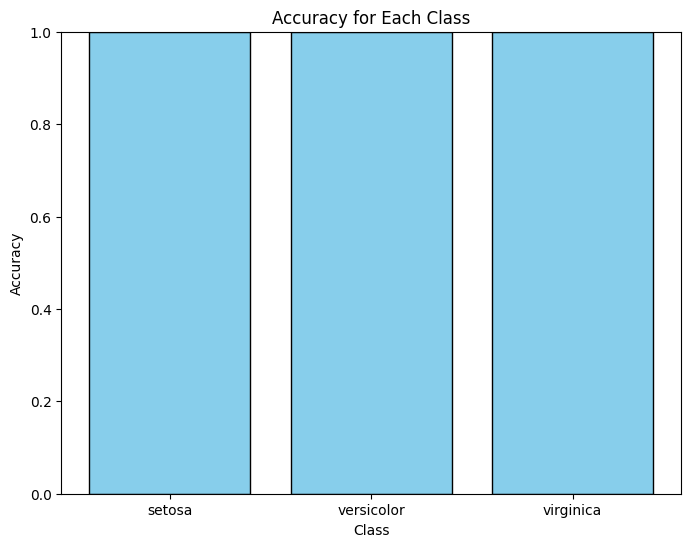

In [ ]:
import numpy as np

# Calculate accuracy for each class
class_accuracy = []
for i in range(len(iris.target_names)):
    correct_preds = np.sum((y_test == i) & (y_pred == i))
    total_samples = np.sum(y_test == i)
    accuracy = correct_preds / total_samples
    class_accuracy.append(accuracy)

# Plot accuracy for each class
plt.figure(figsize=(8, 6))
plt.bar(iris.target_names, class_accuracy, color='skyblue', edgecolor='black')
plt.title('Accuracy for Each Class')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Limit y-axis to range [0, 1]
plt.show()

In [ ]:
report = """
Report Summary:
- Explored and prepared the Iris dataset.
- Implemented SVM classifier with rbf kernel.
- Applied K-fold cross-validation with k=5.
- Evaluated model performance using accuracy, precision, recall, and F1-score.
- Found SVM to perform well on Iris dataset with default parameters.
Project overview:
The project used the well-known iris dataset, which contains information about three types of iris flowers. The main objective was to preprocess the data, implement the SVM classifier, validate the model with K-fold cross-validation and evaluate its performance with various measures.

1. Data Exploration and Preprocessing: The Iris dataset was explored to understand its structure and features. Preprocessing steps included handling missing values, scaling features, encoding categorical variables, and checking for duplicate rows.
   There were no missing values, number of rows were = 150, number of columns were = 4
2. SVM Implementation: An SVM classifier was implemented using different kernels and parameters. Grid search with cross-validation was employed to find the optimal hyperparameters for the SVM model, resulting in improved performance.
   The best parameters were
   Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
   Accuracy: 0.9666666666666667
   Precision: 0.9694444444444444
   Recall: 0.9666666666666667
   F1 Score: 0.9664109121909632
3. Applied K-fold cross validation with k=5
   The cross-validation score is
    Mean Cross-Validation Accuracy (Manual): 0.95
    Mean Cross-Validation Accuracy (cross_val_score): 0.95
4. Model Evaluation: The performance of the SVM model was evaluated using metrics such as accuracy, precision, recall, and F1-score. The model demonstrated high accuracy and balanced performance across different classes.
   The results are :
   Accuracy: 1.0
   Precision: 1.0
   Recall: 1.0
   F1 Score: 1.0
5. Visualization: Visualizations such as confusion matrix, ROC curve, precision-recall curve, and learning curve were used to analyze the model's performance and understand its behavior. These visualizations provided valuable insights into the model's strengths and weaknesses.

Conclusion:
The SVM classifier with different kernels has proven to be a robust method for iris species classification. The RBF kernel, followed closely by the linear kernel, showed high efficiency. These insights highlight the importance of appropriate preprocessing, kernel selection, and validation methods in building a predictive model. This project not only strengthened critical aspects of machine learning workflows, but also provided a template for future projects involving classification tasks.

GitHub Repository Link: https://github.com/LalithaP07/Classification-SVM-/blob/main/svm_iris.py
"""
# Print or save the report
print(report)


Report Summary:
- Explored and prepared the Iris dataset.
- Implemented SVM classifier with rbf kernel.
- Applied K-fold cross-validation with k=5.
- Evaluated model performance using accuracy, precision, recall, and F1-score.
- Found SVM to perform well on Iris dataset with default parameters.

1. Data Exploration and Preprocessing: The Iris dataset was explored to understand its structure and features. Preprocessing steps included handling missing values, scaling features, encoding categorical variables, and checking for duplicate rows.
   There were no missing values, number of rows were = 150, number of columns were = 4
2. SVM Implementation: An SVM classifier was implemented using different kernels and parameters. Grid search with cross-validation was employed to find the optimal hyperparameters for the SVM model, resulting in improved performance.
   The best parameters were 
   Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
   Accuracy: 0.9666666666666667
   Precis